**Stosowane Biblioteki:**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

from pathlib import Path
base_path = Path('/content/drive/MyDrive/DataSets')

import pandas as pd

titanicData = pd.read_csv(base_path/ 'titanic.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Wyświetlenie danych:**

In [ ]:
titanicData.head()
titanicData.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


**Definicje funkcji:**

In [ ]:
def plot_numeric_histogram(df, column_name):
    """
    Rysuje histogram kolumny numerycznej z podziałem na przeżycie.
    Dodaje linie średniej i mediany dla każdej grupy.
    """
    survivedData = df[df["Survived"] == 1][column_name].dropna()
    notSurvivedData = df[df["Survived"] == 0][column_name].dropna()

    plt.figure(figsize=(8, 5))
    #plt.axvline(survivedData.median(), color='blue', linestyle='-', linewidth=1.5, label=f"Median Survived: {survivedData.median():.2f}")
    #plt.axvline(notSurvivedData.median(), color='red', linestyle='-', linewidth=1.5, label=f"Median Not Survived: {notSurvivedData.median():.2f}")

    plt.hist(survivedData, bins=30, alpha=0.6, label="Survived", color="steelblue", edgecolor="black")
    plt.hist(notSurvivedData, bins=30, alpha=0.6, label="Died", color="orange", edgecolor="black")

    plt.title(f"Distribution of {column_name} by Survival")
    plt.xlabel(column_name)
    plt.ylabel("Survived")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_bar(df, column_name):
    """
    Rysuje bar plot pokazujący liczbę pasażerów
    w każdej kategorii kolumny category_col, z podziałem na Survived.

    Parametry:
        df (pd.DataFrame): Dane wejściowe.
        column_name (str): Nazwa kolumny kategorycznej.
    """
    plt.figure(figsize=(8,5))
    sns.countplot(
        data=df,
        x=column_name,
        hue="Survived",
        palette={1:"steelblue", 0: "orange"},
        edgecolor="black"
    )

    plt.title(f"Distribution of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Passengers")
    plt.legend(labels=["Died", "Survived"])
    plt.tight_layout()
    plt.show()

**Klasa podróży i jej wpływ:**

Wizualizacja "Pclass" sugeruje że osoby podróżujące "klasą 3" mieli najmniej szans na przeżycie.

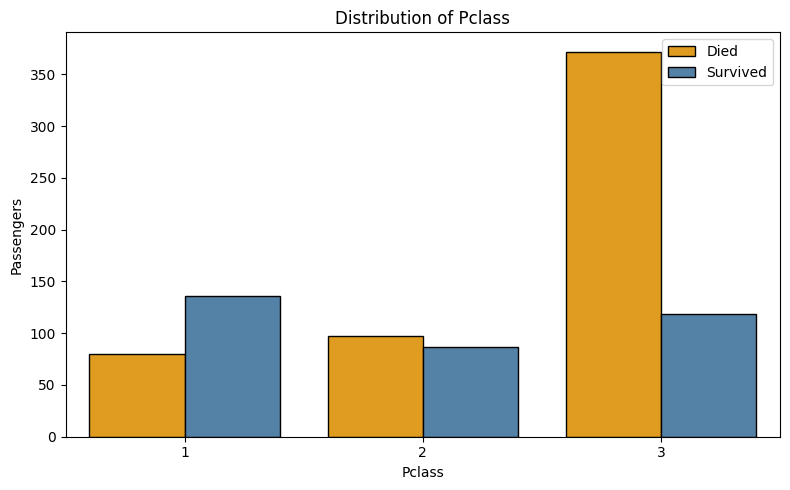

In [ ]:
plot_bar(titanicData, "Pclass")

**Płeć i jej wpływ:**

Wizualizacja "Sex" sugeruje że kobiety mieli większą szansę na przeżycie. Daną sekcję zmieniłem na wartości binarne, oraz ustawiłem typ danych na int64.

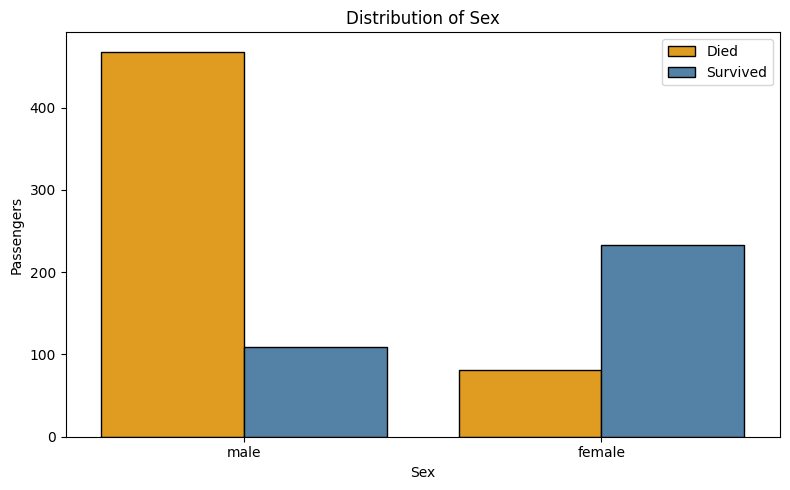

In [ ]:
plot_bar(titanicData, "Sex")

In [ ]:
#Konwersja sekcji na sposób binarny
titanicData["Sex"] = titanicData["Sex"].map({"male":1, "female":0})

**Wiek i jego wpływ:**

Wiek wydawał się być jedna z najważniejszych kategorii, dlatego stwierdziłem że mogą być dwa różne podejścia. Pierwsze polegało na założeniu że wartości wpisane w kolumne takie jak 0.42 to są wpisane omylnie i muszą być zamienione na 42, a wszelkie inne wartości powyżej 1 jedynie zaokrąglałem, zakładało to że było więcej osób starszych na pokładzie co dodatkowo prowadziło później do tego że osoby starsze były priorytetem w ratowaniu. Drugie podejście zakładało że wartości takie jak 0.42 to są miesiące niemowląt, dlatego zaokrągliłem wszelkie te wartości do 1, a wszelkie inne wartości powyżej 1 jedynie zaokrąglałem,  zakładało to że było więcej niemowląt na pokładzie co dodatkowo prowadziło później do tego że one były priorytetem w ratowaniu.  

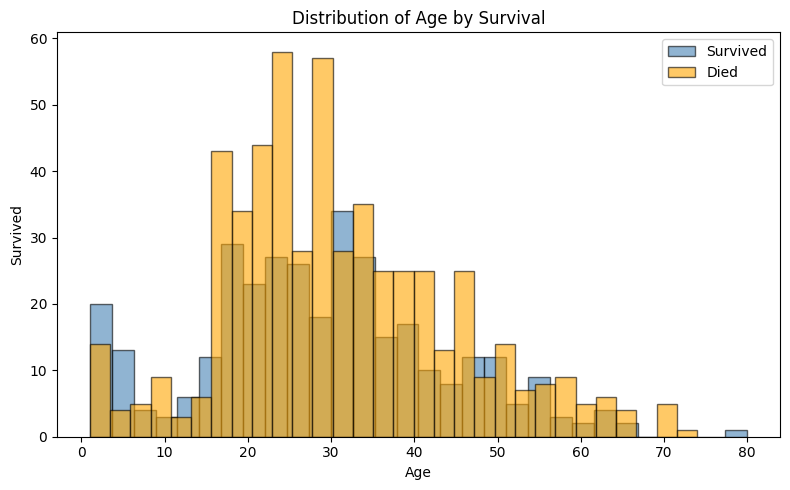

In [ ]:
#Konwersja "błędnych" danych
titanicData["Age"] = titanicData["Age"].apply(
    #lambda x: x*100 if pd.notnull(x) and x < 1 else (round(x) if pd.notnull(x) else x),
    lambda x: 1 if pd.notnull(x) and x < 1 else (round(x) if pd.notnull(x) else x)
)

#Konwersja NaN na losowe wartości ze zbioru
age_values = titanicData["Age"].dropna().values
missing_mask = titanicData["Age"].isna()

titanicData.loc[missing_mask, "Age"] = np.random.choice(age_values, size=missing_mask.sum())

# Konwersja na int
titanicData["Age"] = titanicData["Age"].astype(int)
plot_numeric_histogram(titanicData, "Age")

**Ilość "rodziny" na pokładzie i jej wpływ:**

Wizualizacja ilości rodzeństw i małżonków na pokładzie

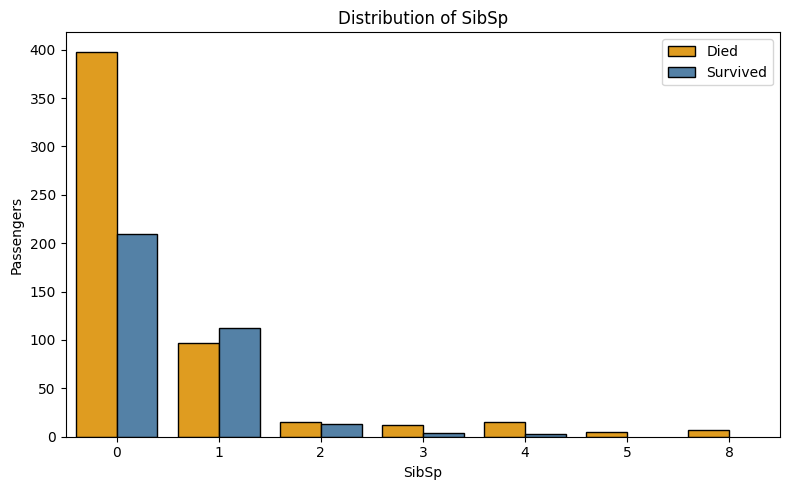

In [ ]:
plot_bar(titanicData, "SibSp")

Wizualizacja ilości rodziców i dzieci na pokładzie

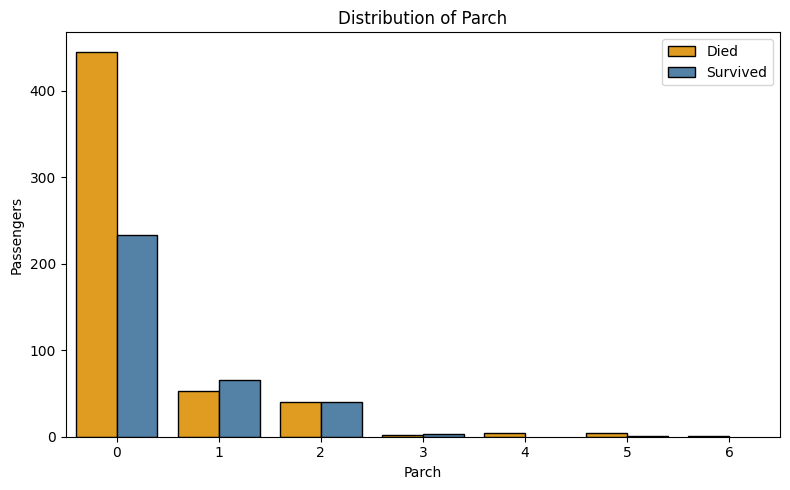

In [ ]:
plot_bar(titanicData, "Parch")

Uznałem że bardziej wartościową informacje będzie niosło czy dana osoba była samotna na pokładzie czy jednak nie. Wydaję się to upraszczać analizę do kolejnego binarnego sprawdzania. Wizualizacja tego sugeruje że "%" faktycznie osoby podróżujące razem mają więskze szanse na przeżycie.

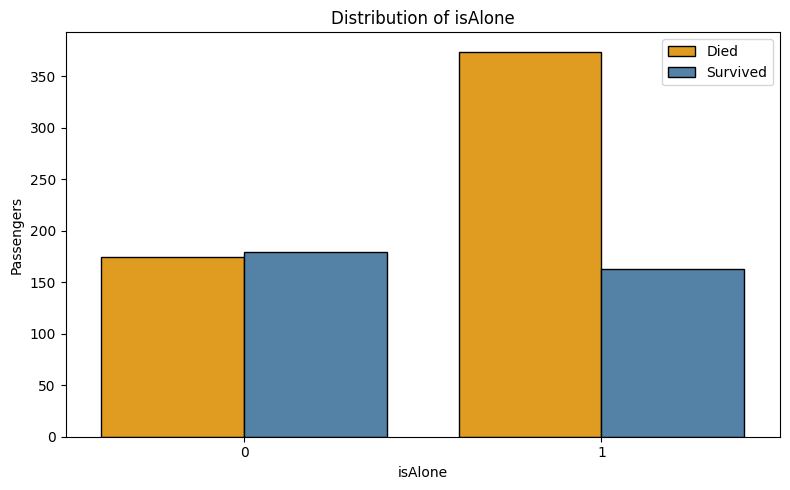

In [ ]:
#"SibSp" and "Parch" create new column "isAlone"
titanicData["isAlone"] = ((titanicData["SibSp"] == 0) & (titanicData["Parch"] == 0)).astype(int)
plot_bar(titanicData, "isAlone")

**Cena biletu i jej wpływ:**

Cena biletu sugeruje że "%" jest większa szansa na przeżycie dla osób które zapłacili więcej, postanowiłem zaokrąglić wszelkie wartości do dwóch miejsc po przecinku.

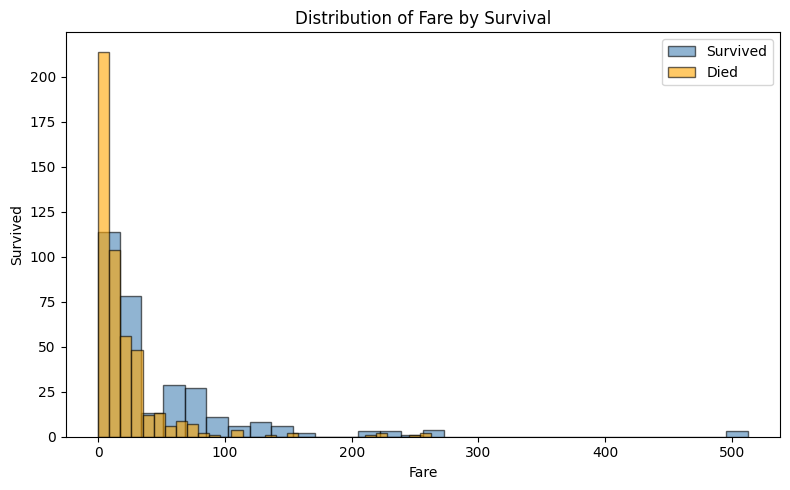

In [ ]:
titanicData["Fare"] = titanicData["Fare"].round(2)
plot_numeric_histogram(titanicData, "Fare")

**Kabina pasażera i jej wpływ:**

Wizualizacja kabin pasażera sugeruje że więcej osób "%" przeżyło gdy się wiedziało jaki pokój posiada dany pasażer.

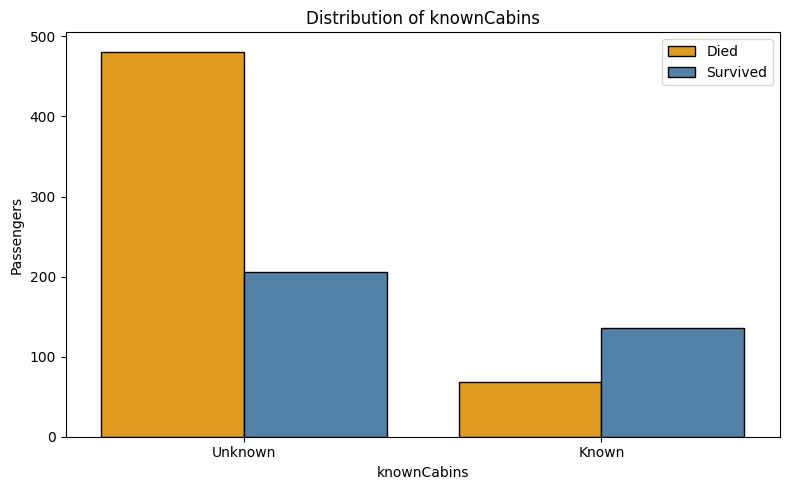

In [ ]:
#Chage NaN to "Unknown"
titanicData["Cabin"] = titanicData["Cabin"].fillna("Unknown")
titanicData["knownCabins"] = titanicData["Cabin"].apply(lambda x: "Unknown" if x == "Unknown" else "Known")
titanicData["knownCabins"]
plot_bar(titanicData, "knownCabins")

In [ ]:
#Konwersja wiedzy o portach na postać binarną
titanicData["knownCabins"] = titanicData["knownCabins"].map({"Known":1, "Unknown":0})

**Port z którego wsiadł pasażer i jego wpływ:**

Wizualizacja portu z którego wsiadł pasażer sugeruje że "%" więcej osób przeżyło wsiadających z portu "Cherbourg", aczkolwiek nie wydaje mi się że dana kolumna faktycznie może określić czy dana osoba przeżyje czy nie


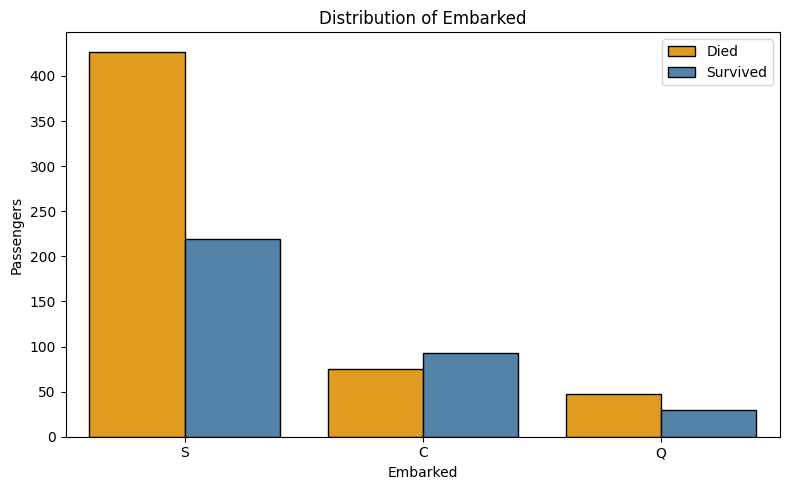

In [ ]:
#Embarked
titanicData["Embarked"] = titanicData["Embarked"].fillna(titanicData["Embarked"].mode()[0])
plot_bar(titanicData, "Embarked")

In [ ]:
#Konwersja sekcji "Embarked" na tryb wyliczeniowy
titanicData["Embarked"] = titanicData["Embarked"].map({"S":0, "C":1, "Q":2})

**Dane ostateczne:**

In [ ]:
finalTitanicData = titanicData.drop(["Name", "Ticket", "Cabin", "SibSp", "Parch"], axis=1)
finalTitanicData.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,isAlone,knownCabins
0,1,0,3,1,22,7.25,0,0,0
1,2,1,1,0,38,71.28,1,0,1
2,3,1,3,0,26,7.92,0,1,0
3,4,1,1,0,35,53.10,0,0,1
4,5,0,3,1,35,8.05,0,1,0
